<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Larminie-Dicks Static Model

### Version 1.3

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#VCell">VCell</a></li>
    <ul>
        <li><a href="#VStack">VStack</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
Larminie-Dicks model is obtained for large variation of the load parameters. In this model, the fuel cell is represented by means of its voltage–current characteristic obtained in static operating mode. In fact, Larminie-Dicks static model presents the fuel cell voltage as a function of the current magnitude. The obtained polarization curve is composed of three main regions corresponding to the predominance of electrochemical activation phenomena (region I), a linear part (region II) where the voltage drop is mainly due to electronic and ionic internal resistances and the last region where the diffusion kinetics of gases through the electrodes becomes the limiting factor (region III). This last zone is characterized by a rapid voltage fall.
It has to be noted that this curve is common to all fuel cells and consequently no units are depicted on it.
</p>

<div style="text-align:center;">
   
<img src="images/Static-Model-Graphic.jpg">  
<p style="text-align:center;">Fig1. Graphical Abstract of Static Models</p>
</div>

## VCell

$$V_{cell}=E_0-A\times ln(\frac{i+i_n}{i_0})-R_m\times (i+i_n)+B\times ln(1-\frac{i+i_n}{i_L})$$


$$B=\frac{RT}{nF}$$

In [1]:
from opem.Static.Larminie_Dicks import Vcell_Calc
Vcell=Vcell_Calc(E0=1.178, i=1,i_0=0.00654,i_n=0.23 ,i_L=100.0 ,R_M=0.0018,A=0.06,B=0.01)
Vcell

0.8614523003154779

* Notice : from opem.Larminie_Dicks in version (0.3>)

### VStack

$$V_{Stack}=N\times V_{cell}$$

In [2]:
from opem.Static.Larminie_Dicks import VStack_Calc
VStack=VStack_Calc(Vcell=Vcell,N=23)
VStack

19.81340290725599

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Stack}=N\times P$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [3]:
from opem.Static.Larminie_Dicks import Power_Calc,PowerStack_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=Vcell,i=2)
Power

1.7229046006309559

In [4]:
PowerStack_Calc(Power=Power,N=23)

39.62680581451198

In [5]:
Power_Thermal_Calc(VStack=VStack,N=23,i=2)

16.953194185488016

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{cell}}{HHV}$$

In [6]:
from opem.Static.Larminie_Dicks import Efficiency_Calc
Efficiency_Calc(Vcell=Vcell)

0.5522130130227422

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=98 with `step`=0.1

In [7]:
Test_Vector = {
    "A": 0.06,
    "T": 328.15,
    "E0": 1.178,
    "RM": 0.0018,
    "i_0": 0.00654,
    "i_L": 100.0,
    "i_n": 0.23,
    "N": 23,
    "i-start": 0.1,
    "i-stop": 98,
    "i-step": 0.1,
    "Name": "Larminiee_Test"}


* Notice : "Name", new in version 0.5

In [8]:
from opem.Static.Larminie_Dicks import Static_Analysis
data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Larminie-Dicks-Model Simulation
###########
Analyzing . . .
I : 0.1
PEM Efficiency : 0.6039038043415609 
Power : 0.09420899347728351 W
Power-Stack : 2.1668068499775206 W
Power-Thermal : 0.6621931500224794 W
VStack : 21.668068499775206 V
Vcell : 0.9420899347728351 V
###########
I : 0.2
PEM Efficiency : 0.5935988388304153 
Power : 0.1852028377150896 W
Power-Stack : 4.259665267447061 W
Power-Thermal : 1.3983347325529394 W
VStack : 21.298326337235302 V
Vcell : 0.9260141885754479 V
###########
I : 0.3
PEM Efficiency : 0.5854323548069047 
Power : 0.2739823420496314 W
Power-Stack : 6.301593867141523 W
Power-Thermal : 2.185406132858478 W
VStack : 21.00531289047174 V
Vcell : 0.9132744734987713 V
###########
I : 0.4
PEM Efficiency : 0.5786600533545858 
Power : 0.3610838732932615 W
Power-Stack : 8.304929085745016 W
Power-Thermal : 3.011070914254985 W
VStack : 20.762322714362536 V
Vcell : 0.9027096832331538 V
###########
I : 0.5
PEM Efficiency : 0.5728692080343738 
Power : 0.4468379822

Power-Stack : 354.2913237999228 W
Power-Thermal : 330.32667620007715 W
VStack : 14.640137347104249 V
Vcell : 0.636527710743663 V
###########
I : 24.3
PEM Efficiency : 0.40774608343311153 
Power : 15.456838530782393 W
Power-Stack : 355.50728620799504 W
Power-Thermal : 331.9397137920049 W
VStack : 14.629929473580043 V
Vcell : 0.636083890155654 V
###########
I : 24.4
PEM Efficiency : 0.4074622063410448 
Power : 15.509641422165528 W
Power-Stack : 356.72175270980716 W
Power-Thermal : 333.5542472901928 W
VStack : 14.619743963516687 V
Vcell : 0.6356410418920299 V
###########
I : 24.5
PEM Efficiency : 0.4071789473116813 
Power : 15.56237936625246 W
Power-Stack : 357.9347254238066 W
Power-Thermal : 335.17027457619344 W
VStack : 14.609580629543125 V
Vcell : 0.6351991578062228 V
###########
I : 24.6
PEM Efficiency : 0.40689630118540454 
Power : 15.615052454291087 W
Power-Stack : 359.146206448695 W
Power-Thermal : 336.787793551305 W
VStack : 14.599439286532316 V
Vcell : 0.6347582298492311 V
######

Vcell : 0.5647436961961171 V
###########
I : 43.0
PEM Efficiency : 0.3617947814411964 
Power : 24.26919393907546 W
Power-Stack : 558.1914605987356 W
Power-Thermal : 658.2785394012644 W
VStack : 12.98119675811013 V
Vcell : 0.5643998590482665 V
###########
I : 43.1
PEM Efficiency : 0.361574550696044 
Power : 24.310826490599215 W
Power-Stack : 559.149009283782 W
Power-Thermal : 660.1499907162181 W
VStack : 12.973294878974059 V
Vcell : 0.5640562990858287 V
###########
I : 43.2
PEM Efficiency : 0.3613544965856583 
Power : 24.352402233900687 W
Power-Stack : 560.1052513797158 W
Power-Thermal : 662.0227486202842 W
VStack : 12.965399337493421 V
Vcell : 0.563713014673627 V
###########
I : 43.3
PEM Efficiency : 0.3611346180678684 
Power : 24.393921181248373 W
Power-Stack : 561.0601871687126 W
Power-Thermal : 663.8968128312873 W
VStack : 12.957510096275119 V
Vcell : 0.5633700041858747 V
###########
I : 43.4
PEM Efficiency : 0.3609149141064594 
Power : 24.435383344663727 W
Power-Stack : 562.0138169

I : 66.2
PEM Efficiency : 0.31374021172793004 
Power : 32.400579145566795 W
Power-Stack : 745.2133203480363 W
Power-Thermal : 1127.5846796519638 W
VStack : 11.25699879679813 V
Vcell : 0.4894347302955709 V
###########
I : 66.3
PEM Efficiency : 0.31353993379749334 
Power : 32.42880827280714 W
Power-Stack : 745.8625902745642 W
Power-Thermal : 1129.7644097254356 W
VStack : 11.249812824654061 V
Vcell : 0.48912229672408963 V
###########
I : 66.4
PEM Efficiency : 0.3133396618547415 
Power : 32.45697553356155 W
Power-Stack : 746.5104372719156 W
Power-Thermal : 1131.9455627280845 W
VStack : 11.242627067348126 V
Vcell : 0.48880987249339675 V
###########
I : 66.5
PEM Efficiency : 0.3131393951534073 
Power : 32.48508085321447 W
Power-Stack : 747.1568596239329 W
Power-Thermal : 1134.1281403760672 W
VStack : 11.235441498104253 V
Vcell : 0.48849745643931536 V
###########
I : 66.6
PEM Efficiency : 0.3129391329440082 
Power : 32.51312415635067 W
Power-Stack : 747.8018555960655 W
Power-Thermal : 1136.31

PEM Efficiency : 0.2711922748724581 
Power : 36.67929756104971 W
Power-Stack : 843.6238439041433 W
Power-Thermal : 1609.119156095857 W
VStack : 9.730378822423797 V
Vcell : 0.42305994880103465 V
###########
I : 86.8
PEM Efficiency : 0.2709630591938565 
Power : 36.69056591932171 W
Power-Stack : 843.8830161443994 W
Power-Thermal : 1611.6889838556003 W
VStack : 9.72215456387557 V
Vcell : 0.4227023723424161 V
###########
I : 86.9
PEM Efficiency : 0.2707333554951243 
Power : 36.70169660434103 W
Power-Stack : 844.1390218998437 W
Power-Thermal : 1614.2619781001565 W
VStack : 9.71391279516506 V
Vcell : 0.4223440345723939 V
###########
I : 87.0
PEM Efficiency : 0.2705031552540298 
Power : 36.712688231076925 W
Power-Stack : 844.3918293147692 W
Power-Thermal : 1616.8381706852306 W
VStack : 9.70565321051459 V
Vcell : 0.4219849221962865 V
###########
I : 87.1
PEM Efficiency : 0.2702724497504888 
Power : 36.72353938229742 W
Power-Stack : 844.6414057928406 W
Power-Thermal : 1619.4175942071593 W
VStack

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [9]:
data_2=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Larminie-Dicks-Model Simulation
###########
Analyzing . . .
Done!


In [10]:
Static_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Larminie-Dicks Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [11]:
import sys
!{sys.executable} -m pip -q -q install matplotlib;
import matplotlib.pyplot as plt

In [12]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()

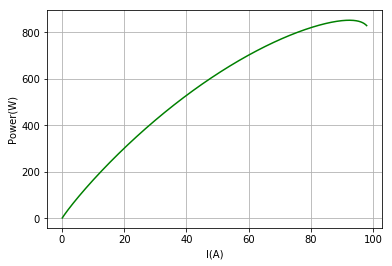

In [13]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

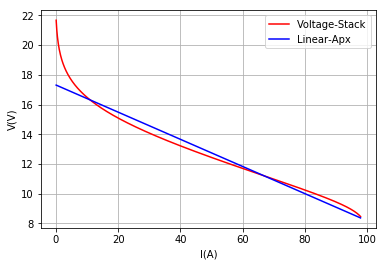

In [14]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

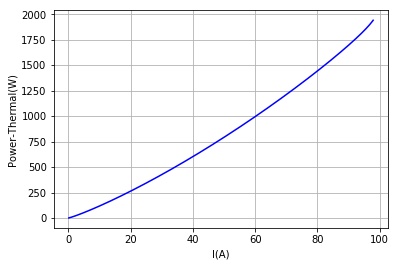

In [15]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

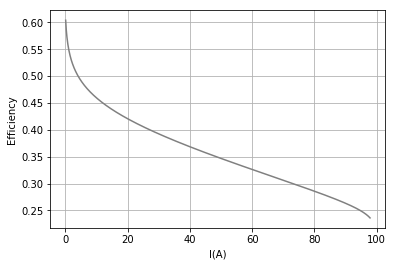

In [16]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

<a href="Larminie-Dicks/Larminiee_Test.html">HTML File</a>

<a href="Larminie-Dicks/Larminiee_Test.opem">OPEM File</a>

<a href="Larminie-Dicks/Larminiee_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">Fuel cell reversible no loss voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Cell operation temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">The slope of the Tafel line</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_n$$</td>
        <td style="text-align:center;">Internal current</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_0$$</td>
        <td style="text-align:center;">Exchange current at which the overvoltage begins to move
from zero</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_L$$</td>
        <td style="text-align:center;">Limiting current</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R_m$$</td>
        <td style="text-align:center;">The membrane and contact resistances</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N$$</td>
        <td style="text-align:center;">Number of single cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
         <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Constant in the mass transfer term </td>
        <td>$$V$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
                <tr>
    <td>$$n$$</td>
        <td style="text-align:center;">Number of moles of electrons transferred in the balanced equation occurring in the fuel cell</td>
        <td>$$--$$</td>
        <td>$$2$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
1-I. Sadli, P. Thounthong, J.-P. Martin, S. Rael, B. Davat. 2006.
"Behaviour of a PEMFC supplying a low voltage static converter."
Journal of Power Sources (Elsevier) 156: 119–125.
doi:10.1016/j.jpowsour.2005.08.021.
</blockquote>
<blockquote>
2-Larminie, J., Dicks, A., & McDonald, M. S. 2003. Fuel cell systems explained (Vol. 2, pp. 207-225). Chichester, UK: J. Wiley. doi: 10.1002/9781118706992.
</blockquote>